# MNIST with SciKit-Learn and skorch

This notebooks shows how to define and train a simple Neural-Network with PyTorch and use it via skorch with SciKit-Learn.

<table align="left"><td>
<a target="_blank" href="https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>  
</td><td>
<a target="_blank" href="https://github.com/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td></table>

**Note**: If you are running this in [a colab notebook](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb), we recommend you enable a free GPU by going:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

If you are running in colab, you should install the dependencies and download the dataset by running the following cell:

In [1]:
import subprocess

# Installation on Google Colab
try:
    import google.colab
    subprocess.run(['python', '-m', 'pip', 'install', 'skorch' , 'torch'])
except ImportError:
    pass

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Loading Data
Using SciKit-Learns ```fetch_openml``` to load MNIST data.

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

In [4]:
mnist.data.shape

(70000, 784)

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
mnist_dim = X.shape[1]
hidden_dim = int(mnist_dim/8)
output_dim = len(np.unique(mnist.target))

In [ ]:
mnist_dim, hidden_dim, output_dim

(784, 98, 10)

grok

In [6]:
# Kurulum ve Veri Yükleme (Tek Hücre)
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Veri yükle ve hazırla
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Veri hazır: Eğitim seti şekli:", x_train.shape)

Veri hazır: Eğitim seti şekli: (60000, 28, 28, 1)


In [7]:
# Model Oluşturma ve Eğitim (Tek Hücre)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Overfitting önleme
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()  # Mimariyi göster

# Eğit
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8337 - loss: 0.5391 - val_accuracy: 0.9731 - val_loss: 0.0934
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9586 - loss: 0.1353 - val_accuracy: 0.9795 - val_loss: 0.0712
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9714 - loss: 0.0912 - val_accuracy: 0.9828 - val_loss: 0.0620
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9775 - loss: 0.0732 - val_accuracy: 0.9842 - val_loss: 0.0542
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9804 - loss: 0.0640 - val_accuracy: 0.9862 - val_loss: 0.0496


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9816 - loss: 0.0500
Test doğruluk: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


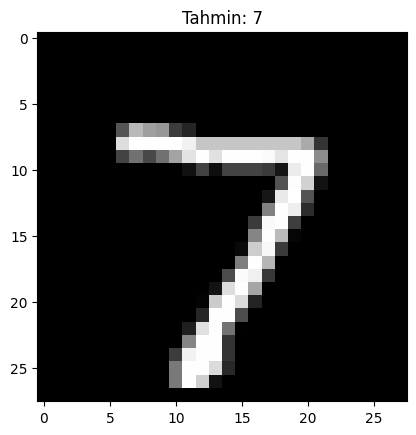

In [8]:
# Değerlendirme ve Görselleştirme (Tek Hücre)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test doğruluk: {test_acc:.2f}")

# Örnek tahmin
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Tahmin: {np.argmax(model.predict(x_test[0:1]))}")
plt.show()

chat gpt

Problem:
El yazısı rakamların (0–9) 28×28 gri seviye görüntülerinden sınıflandırılması.

Veri seti: MNIST

Train: 60.000 örnek, Test: 10.000 örnek

Girdi: 28×28 tek kanal görüntü

Etiket: 0–9 arası integer sınıf etiketi

Ön işlem adımları:

Normalize:

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0


Kanal boyutu ekleme:

x_train = x_train[..., None]  # (60000, 28, 28, 1)
x_test  = x_test[..., None]

“Burada piksel değerlerini 0–255’ten 0–1 aralığına çekiyoruz; ayrıca Keras’ın Conv2D katmanı 4 boyutlu tensör bekliyor (batch, height, width, channels) bu yüzden [..., None] ile kanal boyutu ekledik.”

In [8]:
# ============================================================
# 0. Gerekli kütüphanelerin yüklenmesi
# ============================================================

import tensorflow as tf                # TensorFlow ana kütüphane
from tensorflow.keras import datasets  # Hazır veri kümeleri için (MNIST vb.)
from tensorflow.keras import layers    # Katman (Conv2D, Dense, vb.) sınıfları
from tensorflow.keras import models    # Sequential ve Model sınıfları
import numpy as np                     # Sayısal işlemler için NumPy
import matplotlib.pyplot as plt        # Grafik çizimi için Matplotlib

print(tf.__version__)                  # TensorFlow sürümünü ekrana yazdır


2.19.0


In [9]:
# ============================================================
# 1. Veri yükleme ve temel özelliklerin incelenmesi
# ============================================================

# MNIST veri setini yükle: (x_train, y_train) eğitim, (x_test, y_test) test verisi
# x_* : görüntüler, y_* : etiketler (0–9 arası rakamlar)
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print("Eğitim görüntü şekli:", x_train.shape)   # (60000, 28, 28) → 60k adet 28x28 gri görüntü
print("Eğitim etiket şekli:", y_train.shape)    # (60000,) → her görüntü için 1 adet etiket
print("Test   görüntü şekli:", x_test.shape)    # (10000, 28, 28)
print("Test   etiket şekli:", y_test.shape)     # (10000,)

print("Örnek etiketler (ilk 10):", y_train[:10])  # İlk 10 görüntünün hangi rakam olduğunu yaz


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Eğitim görüntü şekli: (60000, 28, 28)
Eğitim etiket şekli: (60000,)
Test   görüntü şekli: (10000, 28, 28)
Test   etiket şekli: (10000,)
Örnek etiketler (ilk 10): [5 0 4 1 9 2 1 3 1 4]


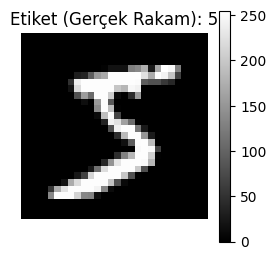

In [10]:
# ------------------------------------------------------------
# 1.a. Tek bir örnek görüntüyü görselleştirelim
# ------------------------------------------------------------

idx = 0                                   # Eğitim setindeki 0. örneğe bakalım
image = x_train[idx]                      # 0. görüntüyü al (28x28)
label = y_train[idx]                      # 0. görüntünün gerçek etiketi

plt.figure(figsize=(3, 3))                # Küçük bir figür alanı oluştur
plt.imshow(image, cmap="gray")            # Gri tonlamalı olarak görüntüyü çiz
plt.title(f"Etiket (Gerçek Rakam): {label}")  # Başlık olarak rakamı yaz
plt.axis("off")                           # Eksen çizgilerini gizle
plt.colorbar()                            # Piksel değerlerini gösteren skala ekle
plt.show()                                # Grafiği ekranda göster


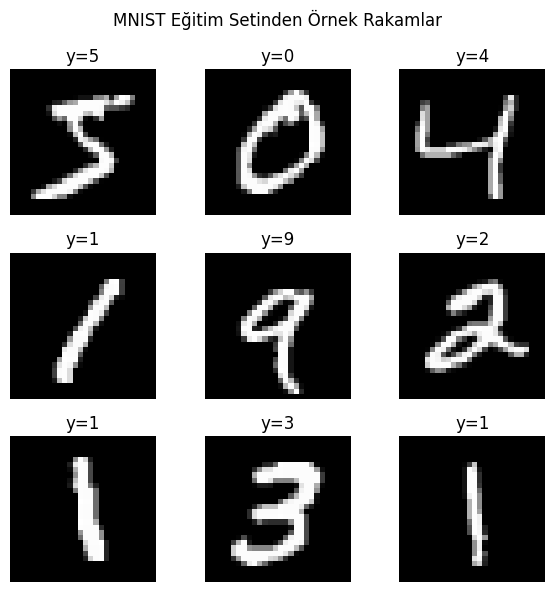

In [11]:
# ------------------------------------------------------------
# 1.b. Birden fazla örneği 3x3 grid şeklinde gösterelim
# ------------------------------------------------------------

plt.figure(figsize=(6, 6))                         # Daha büyük bir figür oluştur
for i in range(9):                                 # İlk 9 örneği çiz
    plt.subplot(3, 3, i + 1)                       # 3x3 grid içinde i+1. subplot
    plt.imshow(x_train[i], cmap="gray")            # i. görüntüyü gri tonlamalı göster
    plt.title(f"y={y_train[i]}")                   # Etiketi başlık olarak yaz
    plt.axis("off")                                # Eksen çizgilerini kapat
plt.suptitle("MNIST Eğitim Setinden Örnek Rakamlar")  # Üst başlık
plt.tight_layout()                                 # Alt alta binmemesi için düzenle
plt.show()                                         # Grafikleri göster


In [12]:
# ============================================================
# 2. Ön işlem (normalizasyon, kanal boyutu ekleme) ve öncesi/sonrası inceleme
# ============================================================

print("Ön işlem öncesi piksel min/max:", x_train.min(), x_train.max())
# Piksel değerleri şu an 0–255 aralığında mı, kontrol et

# Piksel değerlerini float32 tipe çevir (hesaplama için daha uygun)
x_train = x_train.astype("float32")
x_test  = x_test.astype("float32")

# Normalizasyon: 0–255 aralığındaki değerleri 0–1 aralığına ölçekle
x_train = x_train / 255.0
x_test  = x_test / 255.0

print("Ön işlem SONRASI piksel min/max:", x_train.min(), x_train.max())
# Artık piksel değerlerinin 0 ile 1 arasında olduğunu görmeliyiz

# CNN, giriş olarak (yükseklik, genişlik, kanal) boyutunda tensör bekler
# MNIST gri seviye olduğu için kanal sayısı 1 (R-G-B yok, sadece tek kanal)
x_train = np.expand_dims(x_train, axis=-1)   # (60000, 28, 28) → (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, axis=-1)    # (10000, 28, 28) → (10000, 28, 28, 1)

print("Ön işlem SONRASI eğitim şekli:", x_train.shape)  # CNN girişi için son şekli yazdır
print("Ön işlem SONRASI test şekli   :", x_test.shape)


Ön işlem öncesi piksel min/max: 0 255
Ön işlem SONRASI piksel min/max: 0.0 1.0
Ön işlem SONRASI eğitim şekli: (60000, 28, 28, 1)
Ön işlem SONRASI test şekli   : (10000, 28, 28, 1)
